# Preprocessing and Dataset Preparation

The dataset had six classes, hence labels are from 0 to 5. Sc, Rs, PS etc were defect folders and Refined_NEU was the main folder

In [ ]:
import os
import numpy as np
directory = 'drive/My Drive/Refined_NEU/Sc/'
count = 0
from PIL import Image
train_images = []
train_labels = []
for filename in os.listdir(directory):
 
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(0)
      count+=1

directory = 'drive/My Drive/Refined_NEU/RS/'

for filename in os.listdir(directory):
  
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(1)
      count+=1

directory = 'drive/My Drive/Refined_NEU/PS/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(2)
      count+=1


directory = 'drive/My Drive/Refined_NEU/Pa/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(3)
      count+=1
directory = 'drive/My Drive/Refined_NEU/In/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory+ filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(4)
      count+=1
directory = 'drive/My Drive/Refined_NEU/Cr/'
for filename in os.listdir(directory):
    if filename.endswith(".bmp"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      train_images.append(img_arr)
     
      train_labels.append(5)
      count+=1

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

In [ ]:
np.savez("drive/My Drive/NEUconverted-", train_images=train_images, test_images = test_images, train_labels = train_labels, test_labels = test_labels)

# Three Model Levels

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt

In [ ]:
loaded = np.load("drive/My Drive/NEUconverted-.npz") # dataset was stored as a compressed npz file containing four arrays, images were resized to 224*224
train_images = loaded["train_images"]
train_labels = loaded["train_labels"]
test_images = loaded["test_images"]
test_labels = loaded["test_labels"]

In [ ]:
from imgaug import augmenters as iaa
level1 = iaa.Sequential([
       iaa.GaussianBlur(sigma=(0, 1.0)) # blur images with a sigma of 0 to 3.0
])

level2 = iaa.Sequential([
       iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0; can vary the variance for second level if required
])

In [ ]:
images_aug1 = level1(images=train_images)
images_aug2 = level2(images=images_aug1)

#VGG Model1

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
base_model = VGG16(weights="imagenet", include_top=False, input_tensor=keras.layers.Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
ensemble_model1 = Sequential()
for layer in base_model.layers[:-1]:
    ensemble_model1.add(layer)

In [ ]:
for layer in ensemble_model1.layers:
    layer.trainable = False

In [ ]:
ensemble_model1.add(Flatten())
ensemble_model1.add(Dense(units=128, activation='relu'))
ensemble_model1.add(Dense(units=6, activation='softmax'))

In [ ]:
ensemble_model1.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(0.0001), metrics = ['acc'])

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=6)

In [ ]:
#images_aug1 = np.repeat(images_aug1[..., np.newaxis], 3, -1) 
#images_aug2 = np.repeat(images_aug2[..., np.newaxis], 3, -1)    #images_aug2 for third model
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)

In [ ]:

tf.executing_eagerly()

True

In [ ]:
np.random.seed(0)
history =ensemble_model1.fit(train_images, train_labels, epochs=10, batch_size=8)        

Epoch 1/10
169/169 [==============================] - 8s 49ms/step - loss: 0.2181 - acc: 0.9496
Epoch 2/10
169/169 [==============================] - 8s 46ms/step - loss: 0.0182 - acc: 0.9956
Epoch 3/10
169/169 [==============================] - 8s 47ms/step - loss: 0.0022 - acc: 0.9985
Epoch 4/10
169/169 [==============================] - 8s 47ms/step - loss: 0.0010 - acc: 0.9993
Epoch 5/10
169/169 [==============================] - 8s 47ms/step - loss: 1.8304e-05 - acc: 1.0000
Epoch 6/10
169/169 [==============================] - 8s 48ms/step - loss: 1.2319e-06 - acc: 1.0000
Epoch 7/10
169/169 [==============================] - 8s 48ms/step - loss: 1.1429e-06 - acc: 1.0000
Epoch 8/10
169/169 [==============================] - 8s 49ms/step - loss: 1.0673e-06 - acc: 1.0000
Epoch 9/10
169/169 [==============================] - 8s 49ms/step - loss: 9.9883e-07 - acc: 1.0000
Epoch 10/10
169/169 [==============================] - 8s 50ms/step - loss: 9.3808e-07 - acc: 1.0000


In [ ]:
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=6)

In [ ]:
ensemble_model1.evaluate(test_images, test_labels)

In [ ]:
ensemble_model1.save("drive/My Drive/ensemble_model1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: drive/My Drive/ensemble_model1/assets


# Model 2

In [ ]:
ensemble_model2 = Sequential()
for layer in base_model.layers[:-1]:
    ensemble_model2.add(layer)

In [ ]:
for layer in ensemble_model2.layers:
    layer.trainable = False

In [ ]:
ensemble_model2.add(Flatten())
ensemble_model2.add(Dense(units=128, activation='relu'))
ensemble_model2.add(Dense(units=6, activation='softmax'))

In [ ]:
ensemble_model2.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(0.0001), metrics = ['acc'])

In [ ]:
tf.executing_eagerly()
np.random.seed(2)

In [ ]:
history = ensemble_model2.fit(images_aug1, train_labels, epochs=10, batch_size=8)          #use images_aug2 for third model, train_images for basic/first model

Epoch 1/10
169/169 [==============================] - 9s 51ms/step - loss: 0.3221 - acc: 0.9348
Epoch 2/10
169/169 [==============================] - 9s 51ms/step - loss: 0.0199 - acc: 0.9970
Epoch 3/10
169/169 [==============================] - 9s 52ms/step - loss: 0.0013 - acc: 0.9985
Epoch 4/10
169/169 [==============================] - 9s 52ms/step - loss: 0.0026 - acc: 0.9993
Epoch 5/10
169/169 [==============================] - 9s 53ms/step - loss: 0.0010 - acc: 0.9993
Epoch 6/10
169/169 [==============================] - 9s 53ms/step - loss: 0.0012 - acc: 0.9993
Epoch 7/10
169/169 [==============================] - 9s 53ms/step - loss: 1.5453e-08 - acc: 1.0000
Epoch 8/10
169/169 [==============================] - 9s 53ms/step - loss: 7.0643e-10 - acc: 1.0000
Epoch 9/10
169/169 [==============================] - 9s 52ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/10
169/169 [==============================] - 9s 52ms/step - loss: 8.8303e-11 - acc: 1.0000


In [ ]:
ensemble_model2.evaluate(test_images, test_labels)

15/15 [==============================] - 2s 108ms/step - loss: 0.0047 - acc: 0.9978


[0.004666169639676809, 0.9977777600288391]

In [ ]:
ensemble_model2.save("drive/My Drive/ensemble_model2")

INFO:tensorflow:Assets written to: drive/My Drive/ensemble_model2/assets


# Model 3

In [ ]:
ensemble_model3 = Sequential()
for layer in base_model.layers[:-1]:
    ensemble_model3.add(layer)

In [ ]:
for layer in ensemble_model3.layers:
    layer.trainable = False

In [ ]:
ensemble_model3.add(Flatten())
ensemble_model3.add(Dense(units=128, activation='relu'))
ensemble_model3.add(Dense(units=6, activation='softmax'))

In [ ]:
ensemble_model3.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(0.0001), metrics = ['acc'])

In [ ]:
tf.executing_eagerly()
np.random.seed(1)

In [ ]:
history =ensemble_model3.fit(images_aug2, train_labels, epochs=10, batch_size=8)         

Epoch 1/10
169/169 [==============================] - 9s 52ms/step - loss: 0.5285 - acc: 0.9037
Epoch 2/10
169/169 [==============================] - 9s 52ms/step - loss: 0.0542 - acc: 0.9919
Epoch 3/10
169/169 [==============================] - 9s 53ms/step - loss: 0.0212 - acc: 0.9963
Epoch 4/10
169/169 [==============================] - 9s 53ms/step - loss: 0.0027 - acc: 0.9993
Epoch 5/10
169/169 [==============================] - 9s 53ms/step - loss: 0.0063 - acc: 0.9993
Epoch 6/10
169/169 [==============================] - 9s 52ms/step - loss: 1.6071e-08 - acc: 1.0000
Epoch 7/10
169/169 [==============================] - 9s 52ms/step - loss: 3.1789e-09 - acc: 1.0000
Epoch 8/10
169/169 [==============================] - 9s 52ms/step - loss: 2.6491e-10 - acc: 1.0000
Epoch 9/10
169/169 [==============================] - 9s 52ms/step - loss: 0.0000e+00 - acc: 1.0000
Epoch 10/10
169/169 [==============================] - 9s 52ms/step - loss: 0.0000e+00 - acc: 1.0000


In [ ]:
ensemble_model3.evaluate(test_images, test_labels)

15/15 [==============================] - 2s 108ms/step - loss: 0.0430 - acc: 0.9889


[0.04304170235991478, 0.9888888597488403]

In [ ]:
ensemble_model2.save("drive/My Drive/ensemble_model3")

INFO:tensorflow:Assets written to: drive/My Drive/ensemble_model3/assets


# Fusion Using GA Weighted Ensemble : Weighted Voting

In [ ]:
def weighted_ensemble(weights, models, inputs):
    # Assigning empty array to store 2D array of model predictions
    predictions = []
    predictionsSum = 0
  
    # Loop through all models

    for i in range(len(models)):
       labels = models[i].predict(inputs)

       predictions.append(labels)
       predictionsSum += (labels*weights[i])
      
      

    # Sum of weighted predictions
    predictions[i] = [x * weights[i] for x in predictions[i]]
                      
    return predictionsSum

In [ ]:
import numpy as np

def cal_pop_fitness(fitness_func, pop):
    
    fitness = fitness_func(pop)
    return fitness


def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next
    # #generation.
    
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.min(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
        print(parents.shape)
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k % parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1) % parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(0, 1, 1)
        offspring_crossover[idx-1, offspring_crossover.shape[0]-1] = \
            offspring_crossover[idx-1, offspring_crossover.shape[0]-1] + random_value
    return offspring_crossover

In [ ]:
def ensemble_fitness(weights, models, inputs, targets, value):
    import numpy as np
    import sklearn
    from sklearn import linear_model
    from sklearn import metrics
    

    fitness = []

    # Normalise weights
    weights = sklearn.preprocessing.normalize(weights, axis=1, norm='l1')

    for i in range(len(weights)):
        predictionsSum = weighted_ensemble(weights[i-1], models, inputs)

        # Calculating bias and variance for use in error if selected
        bias = (np.mean(predictionsSum)-np.mean(targets))**2
        variance = np.var(predictionsSum-targets)

        # Setting output fitness value
        if value == "mse":
            ensembleFit = metrics.mean_squared_error(predictionsSum, targets)
        elif value == "mae":
            ensembleFit = metrics.mean_absolute_error(predictionsSum, targets)
        elif value == "bias":
            ensembleFit = bias
        elif value == "variance":
            ensembleFit = variance
        elif value == "error":
            ensembleFit = bias+variance
        elif value == "log_loss":
            ensembleFit = metrics.log_loss()
        else:
            # If error with input then set it to mse as default
            ensembleFit = metrics.mean_squared_error(predictionsSum, targets)

        fitness.append(ensembleFit)

    # Returning fitness value to minimise
    return fitness

In [ ]:
models = []
models.append(ensemble_model1)
models.append(ensemble_model2)
models.append(ensemble_model3)


In [ ]:
# Create objective function
objective_function = lambda w: ensemble_fitness(w, models, test_images, test_labels, 'mse')

In [ ]:
# Set Genetic Algorithm parameters
sol_per_pop = 6
num_parents_mating = 3 
# Defining population size
pop_size = (sol_per_pop, len(models))
print(pop_size)
# Creating the initial population

new_population = np.random.uniform(low=0, high=1, size=pop_size)
print(new_population)

(6, 3)
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]
 [5.38816734e-01 4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01 2.73875932e-02]
 [6.70467510e-01 4.17304802e-01 5.58689828e-01]]


In [ ]:
for generation in range(30):
    print("Generation: ", generation)
    # Measuring the fitness of each chromosome in the population
    fitness = cal_pop_fitness(objective_function, new_population)

    # Selecting the best parents in the population for mating
    parents = select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover
    offspring_crossover = crossover(parents, offspring_size=(parents.shape[0], len(models)))

    # Adding some variations to the offspring using mutation
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration
    #print("NOTHING")
    print("FITNESS VALUE:", fitness)

Generation:  0
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.0010448471, 0.0005954858, 0.00092597405, 0.0010523122, 0.0011356473, -99999999999]
Generation:  1
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.0011240622, -99999999999, 0.0010448471, 0.0010448471, 0.0011561204, 0.001453308]
Generation:  2
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.001522527, -99999999999, 0.0010448471, 0.0010448471, 0.001218648, 0.0014054592]
Generation:  3
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.0014852564, -99999999999, 0.0010448471, 0.0010448471, 0.0014927784, 0.0010929717]
Generation:  4
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.0010669698, -99999999999, 0.0010448471, 0.0010448471, 0.0011404712, 0.0014859834]
Generation:  5
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.0011004694, -99999999999, 0.0010448471, 0.0010448471, 0.0012748032, 0.0015184014]
Generation:  6
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE: [0.0013306959, -99999999999, 0.0010448471, 0.0010448471, 0.0014052574, 0.0012197603]
Generation:  7
(3, 3)
(3, 3)
(3, 3)
FITNESS VALUE:

In [ ]:
# Get the best solution after all generations
fitness = cal_pop_fitness(objective_function, new_population)
# Return the index of that solution and corresponding best fitness
best_match_idx = np.where(fitness == np.min(fitness))
best_match = list(best_match_idx[0])
print(best_match)
print(fitness)

[1, 2, 3]
[0.0013737316, 0.0010448471, 0.0010448471, 0.0010448471, 0.0010538091, 0.0015069781]


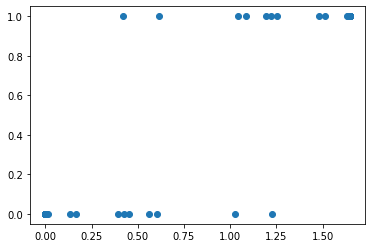

In [ ]:
# Return weights
import matplotlib.pyplot as pyplot

weights = new_population[int(best_match[0])]
# Display optimised network ensemble accuracy details
results = weighted_ensemble(weights, models, test_images)
pyplot.scatter(results, test_labels)
pyplot.show()

In [ ]:
weights = new_population[int(best_match[0])]

In [ ]:
i=0
sum = 0.00
while(i<3):
  sum+= (models[i].predict(test_images))* weights[i]
  i+=1

# Evaluation of Final Results

In [ ]:
final = np.argmax(sum/(np.sum(weights)), axis = 1)

In [ ]:
test_labels = loaded["test_labels"]     #not using one hot encoded ones 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(final, test_labels)

0.9955555555555555

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(40, 40)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.98507463 0.         0.         0.         0.01492537 0.        ]
 [0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.98507463 0.         0.01492537]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


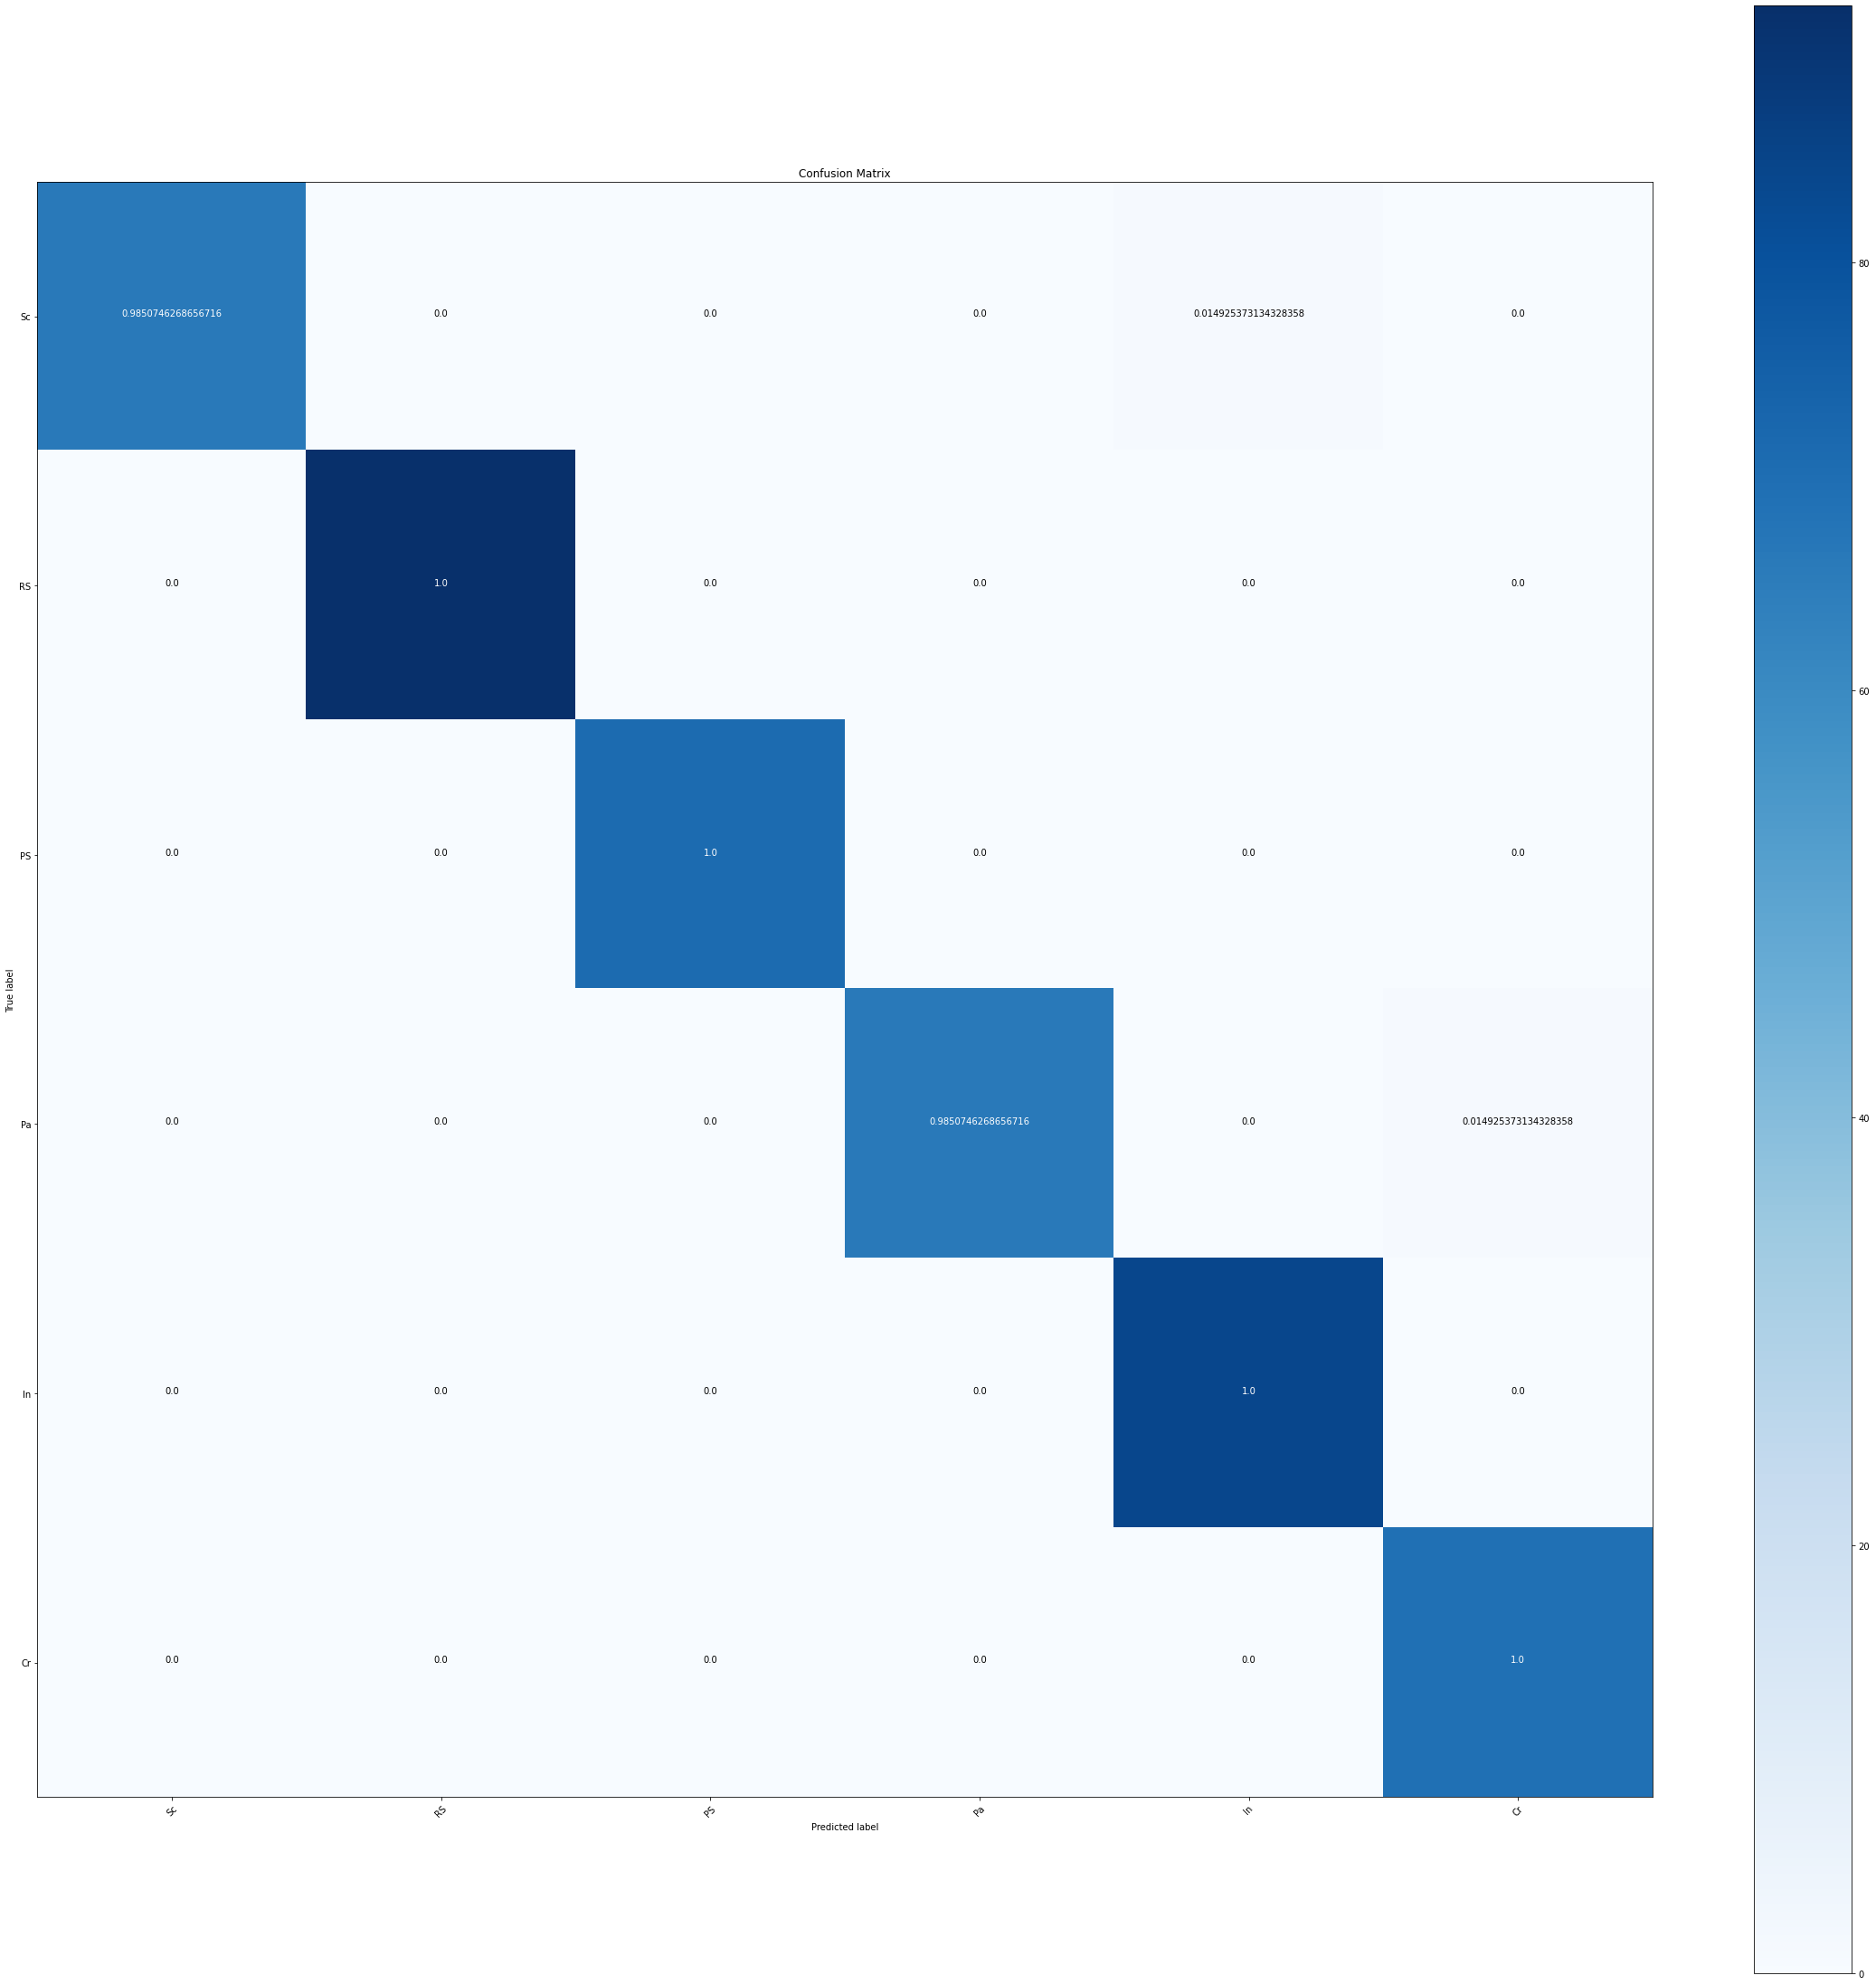

In [ ]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_plot_labels = ['Sc', 'RS', 'PS', 'Pa', 'In', 'Cr']
cm= confusion_matrix(y_true = test_labels, y_pred = final)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix', normalize = True)